In [2]:
import pandas as pd
import os
from common import collect_results
from pathlib import Path
from matplotlib import pyplot as plt

In [3]:
ROOT = Path("./scalability")
OUTPUT_DIR = os.path.join(os.path.abspath(os.curdir) , "output")
print(OUTPUT_DIR)


def get_matcher(prefix):
    def matcher(p: Path):
        import re
        pattern = re.compile(prefix + r"-regions(\d+)-hot(\d+)-(\w)-mr(\d+)-([\d-]+)")
        match = pattern.match(p.name)
        if not match:
            return None

        print("Found result:", p.name)
        hot = int(match.group(2))
        return {
            "regions": int(match.group(1)),
            "hot": 1000000 if hot == 0 else hot,
            "workload": str(match.group(3)),
            "mr": int(match.group(4)),
            "suffix": str(match.group(5)),
        }
    
    return matcher

/Users/poojanilangekar/sunstorm-analysis/output


In [4]:
RENEW_CACHE = False

sunstorm_matcher = get_matcher("scalability-sunstorm")
sunstorm_throughput_df = collect_results(
    ROOT / "sunstorm",
    sunstorm_matcher,
    RENEW_CACHE,
)
sunstorm_throughput_df["system"] = "sunstorm"

aurora_matcher = get_matcher("scalability-aurora")
aurora_throughput_df = collect_results(
    ROOT / "aurora",
    aurora_matcher,
    RENEW_CACHE,
)
aurora_throughput_df["system"] = "aurora"

yugabyte_matcher = get_matcher("scalability-yugabyte")
yugabyte_throughput_df = collect_results(
    ROOT / "yugabyte",
    yugabyte_matcher,
    RENEW_CACHE,
)
yugabyte_throughput_df["system"] = "yugabyte"


In [5]:
throughput_df = pd.concat([
    sunstorm_throughput_df,
    aurora_throughput_df,
    yugabyte_throughput_df,
])
throughput_df

,path,region,regions,hot,workload,mr,suffix,rejected,rejected.WorkloadF1,rejected.WorkloadF2,...,ood_table.WorkloadF1,ood_tuple.WorkloadF1,other_aborts.WorkloadF1,deadlock.WorkloadF1,ood_index_page,ood_table,ood_tuple,other_aborts,deadlock,system
0,scalability/sunstorm/scalability-sunstorm-regi...,6-eu-central-1-0,6,10000,F,5,20240531-120543,9688,4143,3375.0,...,0,0,0,0,1115,0,4216,0,0,sunstorm
1,scalability/sunstorm/scalability-sunstorm-regi...,4-us-west-1-0,6,10000,F,5,20240531-120543,9521,4472,3091.0,...,0,0,0,0,1029,0,3780,0,0,sunstorm
2,scalability/sunstorm/scalability-sunstorm-regi...,1-us-east-1-0,6,10000,F,5,20240531-120543,9106,4262,2986.0,...,0,0,0,0,1092,0,3519,0,0,sunstorm
3,scalability/sunstorm/scalability-sunstorm-regi...,5-ap-southeast-1-0,6,10000,F,5,20240531-120543,10140,4118,3619.0,...,0,0,0,0,1137,0,4659,0,0,sunstorm
4,scalability/sunstorm/scalability-sunstorm-regi...,3-ap-northeast-1-0,6,10000,F,5,20240531-120543,9552,4092,3299.0,...,0,0,0,0,1041,0,4196,0,0,sunstorm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,scalability/yugabyte/scalability-yugabyte-regi...,4-us-west-1-0,5,1000000,F,5,20240528-184629,946,770,145.0,...,0,0,0,0,0,0,0,0,0,yugabyte
68,scalability/yugabyte/scalability-yugabyte-regi...,1-us-east-1-0,5,1000000,F,5,20240528-184629,984,805,149.0,...,0,0,0,0,0,0,0,0,0,yugabyte
69,scalability/yugabyte/scalability-yugabyte-regi...,5-ap-southeast-1-0,5,1000000,F,5,20240528-184629,898,672,178.0,...,0,0,0,0,0,0,0,0,0,yugabyte
70,scalability/yugabyte/scalability-yugabyte-regi...,3-ap-northeast-1-0,5,1000000,F,5,20240528-184629,867,663,169.0,...,0,0,0,0,0,0,0,0,0,yugabyte


In [6]:
throughput_df[["system", "regions", "hot", "throughput", "mr"]].groupby(["system", "regions", "hot", "mr"]).sum()

throughput
system   regions hot     mr              
aurora   3       10000   0    6743.106702
                         5    6860.563768
                 1000000 0    6890.915671
                         5    6886.653207
         4       10000   0    5889.045129
                         5    6716.261922
                 1000000 0    6385.500405
                         5    6372.149846
         5       10000   0    6668.187060
                         5    6676.787150
                 1000000 0    6826.774050
                         5    6688.986472
         6       10000   0    5936.615450
                         5    5962.372060
                 1000000 0    5893.263762
                         5    5923.393897
sunstorm 3       10000   0   33977.429398
                         5   19897.207221
                 1000000 0   34098.039323
                         5   21102.976206
         4       10000   0   45464.662700
                         5   28877.353885
                 1000000 0   45522.386748
                         5   30059.965967
         5       10000   0   57564.004708
                         5   40681.553075
                 1000000 0   57352.272786
                         5   41951.273568
         6       10000   0   69775.434685
                         5   47795.964913
                 1000000 0   69892.984196
                         5   47414.046638
yugabyte 3       10000   0    6183.900050
                         5    5412.290467
                 1000000 0    6281.971446
                         5    5511.889699
         4       10000   0    8415.086248
                         5    7187.987489
                 1000000 0    8507.444164
                         5    7414.323533
         5       10000   0   10423.166715
                         5    8955.035556
                 1000000 0   10758.598396
                         5    9115.679448
         6       10000   0   12652.513398
                         5   10720.167533
                 1000000 0   13040.249460
                         5   11097.640073

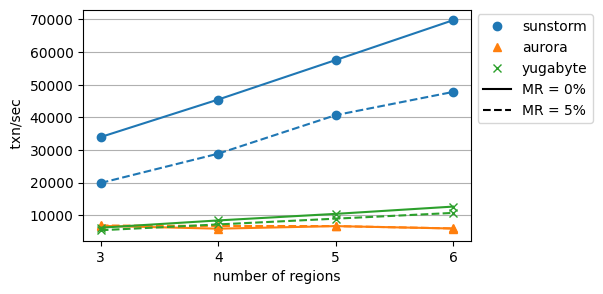

In [14]:
from matplotlib.lines import Line2D

# plt.rc('axes', labelsize=12) 
# plt.rc('legend', fontsize=11)

# for hot in [1000000, 10000]:
for hot in [10000]:
    hot_df = throughput_df[throughput_df.hot == hot]
    hot_label = hot
    ax = hot_df.pivot_table(
        index=["regions"], columns=["system", "mr"], values="throughput", aggfunc="sum"
    )[[
        ("sunstorm", 0),
        ("sunstorm", 5),
        ("aurora", 0),
        ("aurora", 5),
        ("yugabyte", 0),
        ("yugabyte", 5),
    ]].plot(
        xlabel="number of regions",
        ylabel=" txn/sec",
        figsize=(5, 3),
        rot=0,
        # logy=True,
        style={
            ("sunstorm", 0): "o-C0",
            ("sunstorm", 5): "o--C0",
            ("aurora", 0): "^-C1",
            ("aurora", 5): "^--C1",
            ("yugabyte", 0): "x-C2",
            ("yugabyte", 5): "x--C2",
        },
        xticks=range(3, 7),
    )
    # ax.margins(y=0.2)
    ax.grid(axis="y")

    legend_elements = [
        Line2D([0], [0], lw=0, marker='o', color='C0', markerfacecolor='C0', label='sunstorm'),
        Line2D([0], [0], lw=0, marker='^', color='C1', markerfacecolor='C1', label='aurora'),
        Line2D([0], [0], lw=0, marker='x', color='C2', markerfacecolor='C2', label='yugabyte'),
        Line2D([0], [0], color='k', linestyle='-', label='MR = 0%'),
        Line2D([0], [0], color='k', linestyle='--', label='MR = 5%'),
    ]

    plt.legend(
        handles=legend_elements, 
        title="",
        ncol=1,
        bbox_to_anchor=(1, 1.01),
        loc="upper left",
    )
    plt.savefig("scalability-hot10000.pdf", bbox_inches="tight")